# *TP3 Chaines de Markov*

*Professeur: Jules Flin*

*Étudiants: Gustavo Melo Scheidt Paulino & Jose Luis Rativa Medina*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

### Exercice 1. *Paradoxe du singe savant*

On s'intéresse à l'expérience suivante : un singe tape des lettres au hasard sur une machine à écrire. À chaque étape, une nouvelle lettre est tirée uniformément au hasard parmi les lettres d'un alphabet $\mathcal{A}$ (indépendamment de toutes les lettres tapées auparavant), de sorte à obtenir un mot aléatoire infini $M = a_1 a_2 \dots$ sur $\mathcal{A}$.

On se fixe un texte de référence $M_0$ de longueur $\ell$, et on s'intéresse au temps aléatoire $T_0$ (à valeurs dans $\mathbb{N} \cup \{+\infty\}$) défini par

$$T_0 = \inf \{ n : a_{n-\ell+1} \dots a_n = M_0 \}$$


Autrement dit, $T_0$ est le nombre de frappes avant d'observer une première occurrence du texte de référence. On peut par exemple prendre l'alphabet latin pour $\mathcal{A}$ et *Hamlet* de Shakespeare pour $M_0$. Toutefois, et afin de simplifier le code, on choisira $\mathcal{A} := \{1, \dots, N\}$ (en faisant correspondre chaque lettre à sa position dans l'alphabet).

---

1. Montrer que $T_0 < +\infty$ presque sûrement (*paradoxe du singe savant*). Dans le reste de l'exercice, on cherche à estimer précisément ce temps.

2. Soit $X_n$ la taille du plus long suffixe de $a_1 \dots a_n$ qui soit un préfixe de $M_0$. Montrer que $(X_n)_n$ est une chaîne de Markov. Comment interpréter $T_0$ dans ce contexte, si on fixe $\mathbb{P}(X_{n+1} = 0 \mid X_n = \ell) = 1$ ?

3. Écrire un programme qui prend en entrée le texte de référence $M_0$ et renvoie la matrice de transition de cette chaîne de Markov. On pourra tester cette fonction sur des mots courts.

4. Écrire un programme qui à la matrice de transition associe le temps moyen $\mathbb{E}[T_0]$ *(indice : on pourra écrire une fonction auxiliaire qui renvoie un vecteur propre à gauche de la matrice de transition pour la valeur propre 1...)*.

5. La loi de $T_0$ ne dépend en réalité que de la structure de $M_0$ (autrement dit, permuter les lettres de $\mathcal{A}$ laisse invariant la loi de $T_0$). Dénombrer, à $\ell$ fixé, ces structures. Pour chaque structure, dénombrer les mots de longueur $\ell$ sur $\mathcal{A}$ qui admettent cette structure.

6. Écrire un court programme qui prend en entrée $\ell$ et renvoie la liste de toutes les structures de longueur $\ell$.

7. On peut s'intéresser plus seulement à un mot donné : dorénavant le mot $M_0$ est tiré uniformément au hasard parmi les mots de longueur $\ell$. Écrire un programme qui calcule, à partir de la longueur $\ell$ et de l'alphabet $\mathcal{A}$, l'espérance de temps moyen d'observer ce mot de référence.

---

**Réponse Exercice 1.1**


Soit $E_k$ l’événement suivant :

$$
E_k := \{(a_{k\ell + 1}, \dots, a_{(k+1)\ell}) = M_0\}
$$

* Les $E_k$ sont des événements indépendants, car les $a_n$ sont i.i.d.
* Chaque $E_k$ a une probabilité strictement positive :

$$
\mathbb{P}(E_k) = \left( \frac{1}{N} \right)^\ell =: p > 0
$$

* La somme des probabilités est donc :

$$
\sum_{k=1}^{\infty} \mathbb{P}(E_k) = \sum_{k=1}^{\infty} p = +\infty
$$

Par Borel-Cantelli, si $\sum \mathbb{P}(E_k) = +\infty$ et les $E_k$ sont indépendants, alors :

$$
\mathbb{P}(E_k \text{ se produit une infinité de fois}) = 1
$$

Cela implique que le mot $M_0$ apparaîtra au moins une fois, donc :

$$
\mathbb{P}(T_0 < \infty) = 1
$$

Et donc

Le temps d’attente $T_0$ avant l’apparition de $M_0$ est presque sûrement fini, car le mot a une probabilité non nulle d’apparaître à chaque bloc de $\ell$ lettres.

---

**Réponse Exercice 1.2**

Pour montrer que $(X_n)_n$ est une chaîne de Markov, on va determiner la dépendance de $X_{n+1}$ et la propriété de Markov:


Pour déterminer $X_{n+1}$, on observe uniquement :

* la valeur de $X_n$,
* la lettre suivante $a_{n+1}$.

Car:

1. À l’instant $n$, on connaît que le suffixe de longueur $X_n$ coïncide avec un préfixe de $M_0$, i.e.

   $$
   a_{n - X_n + 1}, \dots, a_n = m_1, \dots, m_{X_n}
   $$
2. Lorsque $a_{n+1}$ arrive, on concatène cette lettre à ce suffixe.
3. Le nouveau mot est $m_1, \dots, m_{X_n}, a_{n+1}$.
4. On cherche maintenant la plus grande longueur $k \leq \ell$ telle que le suffixe de ce mot soit égal à $m_1, \dots, m_k$.

Donc le calcul de $X_{n+1}$ ne dépend que de $X_n$ (et non du passé complet) et de la lettre $a_{n+1}$.

On voit maintenant la propriété de Markov:

Par définition, une chaîne de Markov vérifie :

$$
\mathbb{P}(X_{n+1} = j \mid X_n = i, X_{n-1}, \dots, X_0) = \mathbb{P}(X_{n+1} = j \mid X_n = i)
$$

C’est exactement le cas ici, car :

* le passé complet $X_{n-1}, X_{n-2}, \dots$ n’apporte aucune information supplémentaire sur la loi de $X_{n+1}$,
* seule compte la position actuelle $X_n$ et la lettre suivante $a_{n+1}$.

Ainsi, $(X_n)$ est bien une chaîne de Markov.


Interprétation de $T_0$

Le temps d’occurrence du mot $M_0$ est :

$$
T_0 := \inf\{n : (a_{n - \ell + 1}, \dots, a_n) = M_0\}
$$

Ce qui équivaut à :

$$
T_0 := \inf\{n : X_n = \ell\}
$$

Donc $T_0$ est le temps d’atteinte de l’état $\ell$ dans la chaîne de Markov $(X_n)$.


Si on impose :

$$
\mathbb{P}(X_{n+1} = 0 \mid X_n = \ell) = 1
$$

Alors l’état $\ell$ devient absorbant : dès que le mot complet $M_0$ est détecté, la chaîne recommence à 0 (ou s’arrête).

---

In [ ]:
#Réponse Exercice 1.3

def suffixe(word, target):

    max_len = min(len(word), len(target))
    for j in reversed(range(max_len + 1)):
        if word[-j:] == target[:j]:
            return j
    return 0

def matrice_transition(M0, N):
    if isinstance(M0, str):
        M0 = [int(c) for c in M0]

    l = len(M0)
    P = np.zeros((l+1, l+1))

    A = list(range(1, N+1))  # Alphabet = {1, ..., N}

    for i in range(l+1):
        prefix = M0[:i]

        for a in A:  # Pour chaque lettre possible
            new_word = prefix + [a]
            j = suffixe(new_word, M0)
            P[i][j] += 1  # Transition de i vers j

    # Normalisation
    P /= N
    return P

M0 = [1, 2, 1]
N = 2
P = matrice_transition(M0, N)
print(np.round(P, 3))


[[0.5 0.5 0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.5 0.  0.  0.5]
 [0.  0.5 0.5 0. ]]


In [ ]:
#Réponse Exercice 1.4

def esperance_T0(P):
    l = P.shape[0] - 1  # taille du mot
    Q = P[:l, :l]       # sous-matrice des états transitoires

    I = np.eye(l)
    ones = np.ones((l, 1))

    T = np.linalg.solve(I - Q, ones)
    return T[0, 0]

#example
M0 = [1, 2, 1]
N = 2
P = matrice_transition(M0, N)
E_T0 = esperance_T0(P)
print(f"Espérance E[T_0] pour le mot {M0} sur A={{1,...,{N}}} : {E_T0:.4f}")



Espérance E[T_0] pour le mot [1, 2, 1] sur A={1,...,2} : 10.0000


**Réponse Exercice 1.5**

L'idée c'est que la loi de $T_0$ ne dépend pas des lettres exactes du mot $M_0$, mais uniquement de sa structure de répétition.

> Autrement dit : deux mots qui ont les mêmes motifs de répétition auront la même loi de $T_0$, même si les lettres sont différentes.

On voit ça avec un exemple simple:

* `[1, 2, 1]`
* `[4, 7, 4]`
* `[9, 3, 9]`

→ Tous ont la même structure : `[1, 2, 1]` (la 1re et la 3e lettres sont égales)

Donc tous ont la même loi de $T_0$.


Maintenant, avec l'exercice
Le nombre de structures possibles ne dépend que de $\ell$.
Ce sont les différentes manières d’étiqueter un mot en respectant les répétitions.

| $\ell$ | Structures possibles |
| ------ | -------------------- |
| 1      | 1                    |
| 2      | 2 (`[1,1]`, `[1,2]`) |
| 3      | 5                    |
| 4      | 15                   |

(Ce sont les nombres de Bell)


Pour un alphabet de taille $N$, et une structure donnée, on compte :

* Combien de façons de choisir les lettres pour remplir cette structure,
* Tout en respectant que les lettres égales dans la structure restent égales,
* Et les lettres différentes soient choisies distinctement.

Exemple :

* Pour la structure `[1, 2, 1]`, on choisit deux lettres distinctes :

  * $N$ choix pour la 1re,
  * $(N-1)$ pour la 2e,
  * et on répète la 1re.

Donc, `[1,2,1]` a $N(N-1)$ mots compatibles.


In [ ]:
#Réponse Exercice 1.6
def structures_l(length):

    def helper(current, max_label, results):
        if len(current) == length:
            results.append(current[:])
            return
        for i in range(1, max_label + 2):  # nouveau label ou un déjà utilisé
            current.append(i)
            helper(current, max(max_label, i), results)
            current.pop()

    results = []
    helper([], 0, results)
    return results

#example
for s in structures_l(3):
    print(s)


[1, 1, 1]
[1, 1, 2]
[1, 2, 1]
[1, 2, 2]
[1, 2, 3]


In [ ]:
#Réponse Exercice 1.7
import random

def mot_aleatoire(l, N):
    return [random.randint(1, N) for _ in range(l)]

def esperance_T0_moyenne(l, N, n_simulations=1000):
    total = 0
    for _ in range(n_simulations):
        M0 = mot_aleatoire(l, N)
        P = matrice_transition(M0, N)
        E_T0 = esperance_T0(P)
        total += E_T0

    return total / n_simulations

#example
l = 3   # longueur du mot
N = 3   # taille de l'alphabet
n_sim = 500

E_T0_moy = esperance_T0_moyenne(l, N, n_sim)
print(f"Espérance moyenne de T₀ pour mots aléatoires de longueur {l} : {E_T0_moy:.2f}")


Espérance moyenne de T₀ pour mots aléatoires de longueur 3 : 29.02


### Exercice 2. *Flaques aléatoires*

Dans ce dernier exercice, on considère une suite aléatoire de sous-ensembles $(A_n)_n$ du réseau $\mathbb{Z}^d$ construits de la manière suivante : $A_0 = \{0\}$ ($0$ est l'origine de $\mathbb{Z}^d$), et pour tout $n$, $A_{n+1} = A_n \cup \{X_n\}$ où $X_n$ est le premier état de $A_n$ visité par une marche aléatoire symétrique sur $\mathbb{Z}^d$, initialisée en $0$ (toutes ces marches sont supposées indépendantes).

Pour $d = 2$, on peut (par exemple) interpréter $(A_n)_n$ comme une flaque se formant sous un réservoir qui fuit au goutte à goutte.

---

1. Écrire un programme qui simule (et représente séquentiellement) une trajectoire de la chaîne de Markov $(A_n)_n$.

2. On s'intéresse au rayon $(R_n)_n$ de l'amas $A_n$ :
$$
R_n := \sup\{ |a|, \ a \in A_n \}
$$

  La suite $(R_n)_n$ est-elle une chaîne de Markov ?

3. À l'aide de méthodes de Monte Carlo, conjecturer un équivalent $f_d(n)$ pour $\mathbb{E}[R_n]$ (dépend de la dimension $d$).

4. En simulant un grand amas (avec $d = 2$), conjecturer une limite pour $(A_n / f_d(n))_n$.


In [ ]:
#Réponse Exercice 2.1
def random_pas(d):
    direction = random.randint(0, d - 1)
    pas = [0] * d
    pas[direction] = random.choice([-1, 1])
    return tuple(pas)

def simuler_flaques(d=2, N=100):
    A = set()
    A.add((0,) * d)
    A_n = [set(A)]

    for n in range(N):
        position = (0,) * d
        while position in A:
            pas = random_pas(d)
            position = tuple(int(x) for x in np.add(position, pas))
        A.add(position)
        A_n.append(set(A))
        print(f"Pas {n+1}: Ajouté {position}")

    return A_n

In [ ]:
d = 3
d

3

In [ ]:
A_hist = simuler_flaques(d=d, N=100)

Pas 1: Ajouté (0, 0, 1)
Pas 2: Ajouté (0, 1, 0)
Pas 3: Ajouté (0, 1, 1)
Pas 4: Ajouté (0, -1, 0)
Pas 5: Ajouté (-1, 1, 1)
Pas 6: Ajouté (0, 0, -1)
Pas 7: Ajouté (1, 0, -1)
Pas 8: Ajouté (1, 1, 0)
Pas 9: Ajouté (0, 0, -2)
Pas 10: Ajouté (-1, 0, 0)
Pas 11: Ajouté (0, 0, 2)
Pas 12: Ajouté (1, 0, 0)
Pas 13: Ajouté (-1, 0, 1)
Pas 14: Ajouté (1, 0, 1)
Pas 15: Ajouté (1, 1, 1)
Pas 16: Ajouté (-1, -1, 1)
Pas 17: Ajouté (0, 0, 3)
Pas 18: Ajouté (1, -1, 0)
Pas 19: Ajouté (-1, 1, 0)
Pas 20: Ajouté (0, -1, -1)
Pas 21: Ajouté (-1, 0, -1)
Pas 22: Ajouté (-2, 0, 0)
Pas 23: Ajouté (1, -1, -1)
Pas 24: Ajouté (0, -1, 1)
Pas 25: Ajouté (0, -2, 0)
Pas 26: Ajouté (1, 1, -1)
Pas 27: Ajouté (-1, -1, 0)
Pas 28: Ajouté (2, 0, -1)
Pas 29: Ajouté (-1, -2, 0)
Pas 30: Ajouté (1, 2, 0)
Pas 31: Ajouté (0, -2, 1)
Pas 32: Ajouté (1, 0, 2)
Pas 33: Ajouté (0, 1, -1)
Pas 34: Ajouté (0, -1, 2)
Pas 35: Ajouté (2, 0, 0)
Pas 36: Ajouté (0, 1, -2)
Pas 37: Ajouté (0, 2, 0)
Pas 38: Ajouté (2, -1, -1)
Pas 39: Ajouté (1, 0, -2)
P

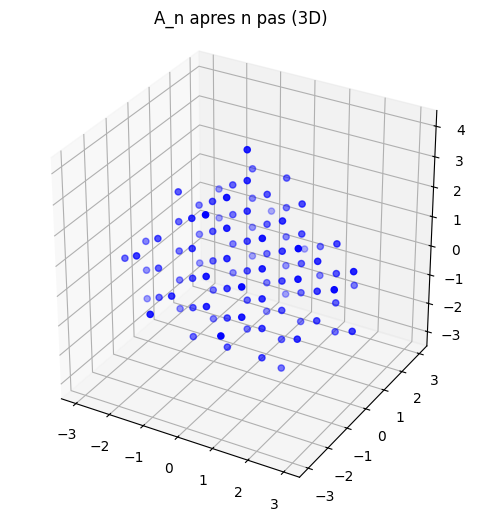

In [ ]:
if d == 2:
    x = [p[0] for p in A_hist[-1]]
    y = [p[1] for p in A_hist[-1]]
    plt.figure(figsize=(6,6))
    plt.scatter(x, y, c="blue")
    plt.title("A_n apres n pas (2D)")
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.show()

elif d == 3:
    x = [p[0] for p in A_hist[-1]]
    y = [p[1] for p in A_hist[-1]]
    z = [p[2] for p in A_hist[-1]]
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='blue', marker='o')
    ax.set_title("A_n apres n pas (3D)")
    ax.set_box_aspect([1,1,1])
    ax.grid(True)
    plt.show()

else:
    print("Graphique pas disponible pour d > 3")



**Réponse Exercice 2.2**

Le rayon $R_n$ de l’amas $A_n$, est défini comme :

$$
R_n := \sup \{ \|a\| \,;\, a \in A_n \}
$$

où $\|a\|$ est la norme euclidienne du vecteur $a$ dans $\mathbb{Z}^d$, donc :

$$
\|a\| = \sqrt{a_1^2 + a_2^2 + \cdots + a_d^2}
$$

C’est la distance du point $a$ à l’origine.



Pour qu’une suite comme $(R_n)$ soit une chaine de Markov, il faut que l’état suivant $R_{n+1}$ ne dépende que de l’état actuel $R_n$, et pas du passé complet $(R_0, R_1, ..., R_n)$ :

$$
\mathbb{P}(R_{n+1} \in B \mid R_0, \dots, R_n) = \mathbb{P}(R_{n+1} \in B \mid R_n)
$$



Mais, ce n’est pas le cas ici :

Même si $R_n$ donne le rayon maximal de l’amas $A_n$, il ne nous dit rien sur la forme du cluster.  
Mais le point qu’on ajoute à l’étape suivante dépend de la marche aléatoire et donc de la position exacte des points déjà présents.

Par exemple, deux amas peuvent avoir le même rayon $R_n = 5$, mais une forme totalement différente :
- Un amas dense autour de l’origine,
- Un amas en ligne droite qui atteint juste 5.

Dans ces deux cas, la probabilité d’ajouter un point encore plus éloigné n’est pas la même.  
Donc, connaître uniquement $R_n$ ne suffit pas pour connaître la suite.


Donc,
$(R_n)_n $  n’est pas une chaîne de Markov parce que la valeur de $R_n$ seule ne permet pas de déduire comment va évoluer le processus. Il manque de l’information sur la structure réelle de $A_n$.


In [ ]:
#Réponse Exercice 2.3

def simuler_Rn(d=2, N=100):
    A = set()
    A.add((0,) * d)
    for _ in range(N):
        position = (0,) * d
        while position in A:
            pas = random_pas(d)
            position = tuple(int(x) for x in np.add(position, pas))
        A.add(position)
    return max(np.linalg.norm(a) for a in A)

def monte_carlo_esperance(d=2, N_list=[10, 20, 50, 100], num_simulations=30):
    E_Rn = []
    for N in N_list:
        print(f"\nSimulations pour N = {N}, dimension d = {d}")
        Rn_echantillons = [simuler_Rn(d=d, N=N) for _ in range(num_simulations)]
        E_Rn.append(np.mean(Rn_echantillons))
    return E_Rn


Simulations pour N = 10, dimension d = 2

Simulations pour N = 20, dimension d = 2

Simulations pour N = 50, dimension d = 2

Simulations pour N = 100, dimension d = 2

Simulations pour N = 10, dimension d = 3

Simulations pour N = 20, dimension d = 3

Simulations pour N = 50, dimension d = 3

Simulations pour N = 100, dimension d = 3

Simulations pour N = 10, dimension d = 4

Simulations pour N = 20, dimension d = 4

Simulations pour N = 50, dimension d = 4

Simulations pour N = 100, dimension d = 4


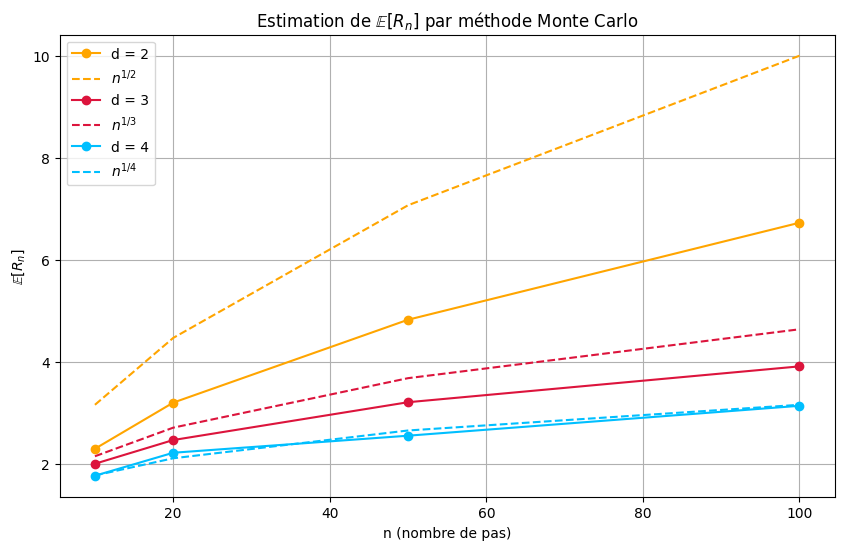

In [ ]:
dimensions = [2, 3, 4]
N_list = [10, 20, 50, 100]
num_simulations = 30

plt.figure(figsize=(10, 6))
colors = ['orange', 'crimson', 'deepskyblue']
for i, d in enumerate(dimensions):
    E_Rn = monte_carlo_esperance(d=d, N_list=N_list, num_simulations=num_simulations)
    plt.plot(N_list, E_Rn, marker='o', color=colors[i], label=f'd = {d}')
    plt.plot(N_list, np.power(N_list, 1/d), '--', color=colors[i], label=fr'$n^{{1/{d}}}$')

plt.xlabel('n (nombre de pas)')
plt.ylabel(r'$\mathbb{E}[R_n]$')
plt.title("Estimation de $\mathbb{E}[R_n]$ par méthode Monte Carlo")
plt.legend()
plt.grid(True)
plt.show()

### Conjecture sur $\mathbb{E}[R_n]$

On a estimé la valeur moyenne du rayon $R_n$ de l’amas $A_n$ en utilisant des méthodes de Monte Carlo, pour différentes dimensions $d \in \{2, 3, 4\}$.

Pour chaque dimension, nous avons comparé la courbe de $\mathbb{E}[R_n]$ avec la fonction théorique :

$$
f_d(n) = n^{1/d}
$$


- Les résultats numériques montrent une bonne concordance entre la courbe de $\mathbb{E}[R_n]$ et la référence théorique $n^{1/d}$.
- Cela confirme l’intuition géométrique : si l’amas $A_n$ croît d’un point à chaque pas, son volume est proportionnel à $n$.
- Comme l’amas est environ sphérique (cf. exercice 4), son rayon moyen doit croître comme le rayon d’une boule de volume $n$, c’est-à-dire \( n^{1/d} \).

$
\mathbb{E}[R_n] \sim C_d \cdot n^{1/d}
$
$
\quad \text{(pour une constante } C_d > 0 \text{ dépendant de la dimension)}
$

Ainsi, la fonction équivalente cherchée est :
$
f_d(n) = n^{1/d}
$


On remarque dans le graphique qu'à mesure que on augmente la dimension, la suite $R_n$ croît plus lentement.



In [ ]:
#Réponse Exercice 2.4
def simuler_flaques_normalises(d=2, N=5000):
    """Simule A_n et retourne les points normalisés par f_d(n) = n^{1/d}"""
    A = set()
    A.add((0,) * d)
    for _ in range(N):
        position = (0,) * d
        while position in A:
            pas = random_pas(d)
            position = tuple(int(x) for x in np.add(position, pas))
        A.add(position)

    facteur_normalisation = N**(1/d)
    A_normalise = np.array([np.array(p) / facteur_normalisation for p in A if len(p) == 2])
    return A_normalise

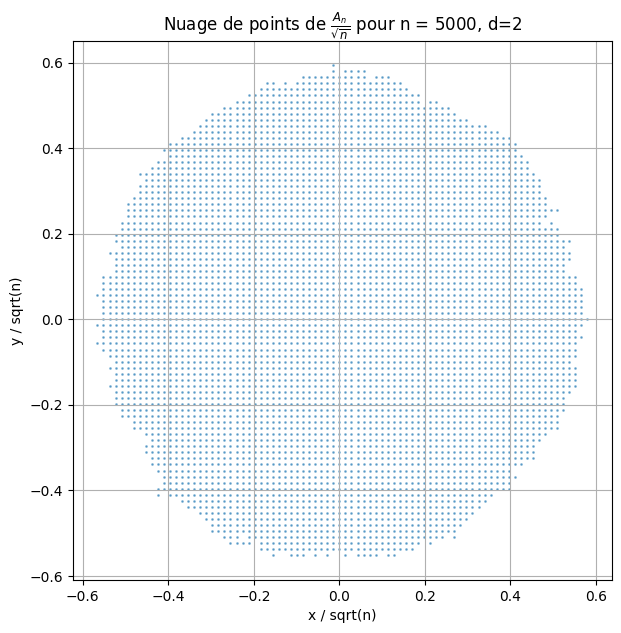

In [ ]:
N = 5000
A_normalise = simuler_flaques_normalises(d=2, N=N)

plt.figure(figsize=(7, 7))
plt.scatter(A_normalise[:, 0], A_normalise[:, 1], s=1, alpha=0.5)
plt.title(r"Nuage de points de $\frac{A_n}{\sqrt{n}}$ pour n = 5000, d=2")
plt.xlabel("x / sqrt(n)")
plt.ylabel("y / sqrt(n)")
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()

###Conjecture :

En simulant un grand amas $A_n$ avec $n = 5000$ et $d = 2$, puis en normalisant les points par $ f_d(n) = n^{1/2} =  \sqrt{n}$, on observe que le nuage de points $\frac{A_n}{\sqrt{n}}$ :

- Est contenu dans une région de forme circulaire,
- Présente une densité radiale approximativement constante**,
- Et semble remplir un disque centré à l’origine.

Donc, on conjecture que la suite $\left( \frac{A_n}{\sqrt{n}} \right)_n$ converge vers un disque de rayon fini dans $\mathbb{R}^2$
